This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/THDDCGCaMP62/100135/100135Final/100135ss2c500regcdFF20sMpsfkfintMB84Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)

In [5]:
DT=Ua['TSmean']

In [6]:
DT.shape

(10183, 84)

In [7]:
S1=DT.shape

In [8]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [9]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [10]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [11]:
DTvar.shape

(10183, 84)

open maps

In [12]:
import nibabel as nb

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/test7/THDDCGCaMP62/100135/100135Final/100135ss2c500regcdFF20sMpsfkfintMB84Smith0_4_60IC.nii


In [14]:
img1 = nb.load(filename2)

In [15]:
data = img1.get_data()

In [16]:
S=data.shape

In [17]:
S

(70, 39, 7, 84)

# Zscore maps

In [18]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [19]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [20]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [21]:
datao=data
Dmapso=Dmaps

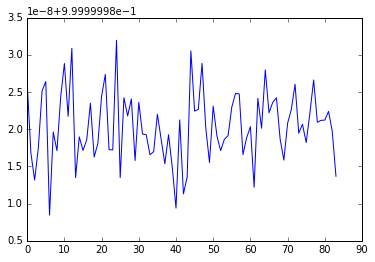

In [22]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [23]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [24]:
Dtemp=data[:,:,:,0]

In [25]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [26]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [27]:
DTvar.shape

(10183, 84)

In [28]:
S

(70, 39, 7, 84)

In [29]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/THDDCGCaMP62/100135/100135Final/100135Xk.mat


In [30]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']
#Xk[1,:]=Ua['Walk']

In [31]:
Xk.shape

(10183, 6)

/media/test7/THDDCGCaMP62/100135/100135Final/MAX_100135ss2c500regcdFF20sMpsfkfintMB84Smith0_4_60IC.nii


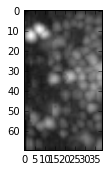

In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

plt.imshow(Vmean,cmap=plt.cm.gray)

In [33]:
Xk=Xk.T

In [34]:
Label_ICs=[]

0


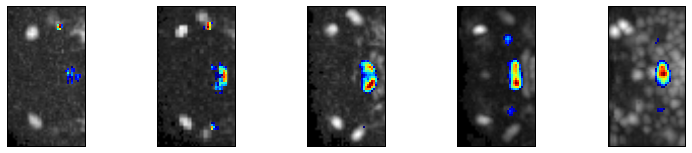

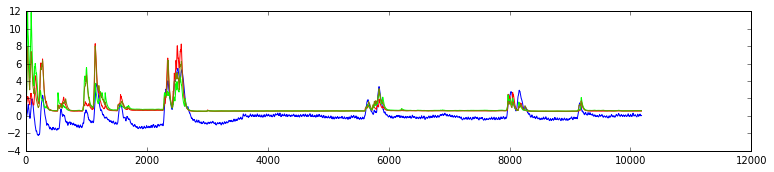


1


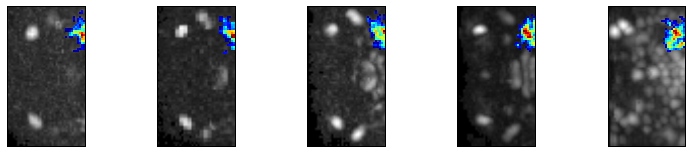

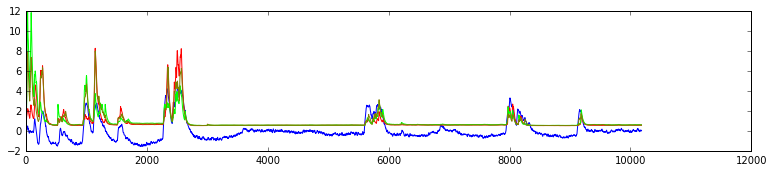


2


/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


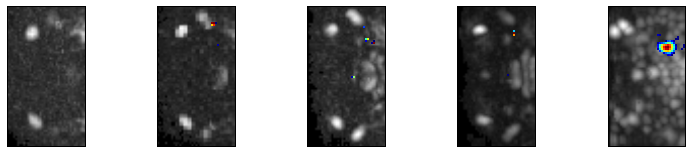

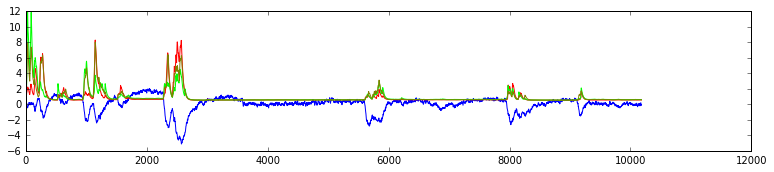


3


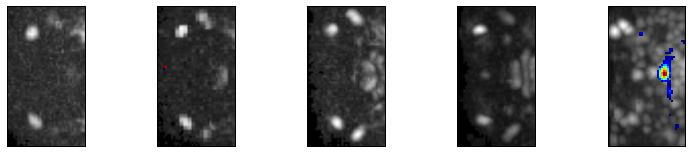

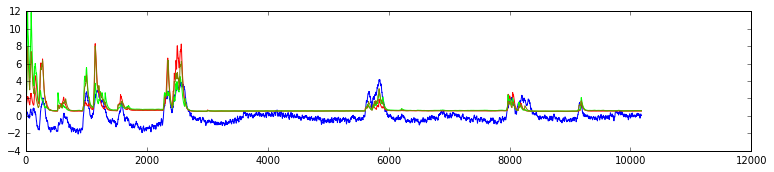


4


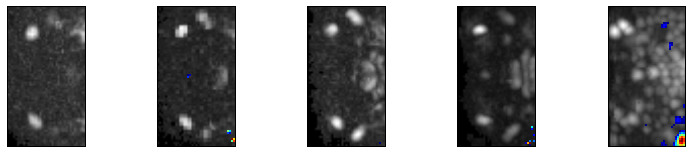

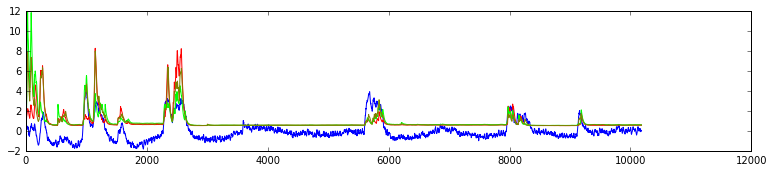


5


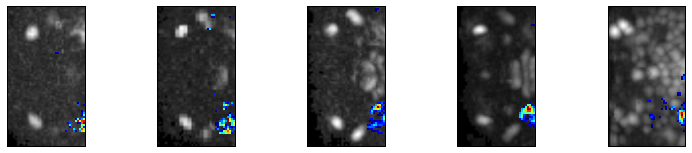

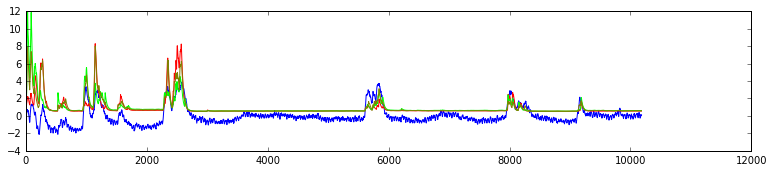


6


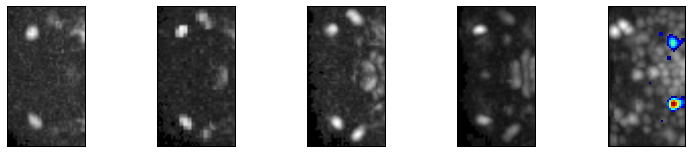

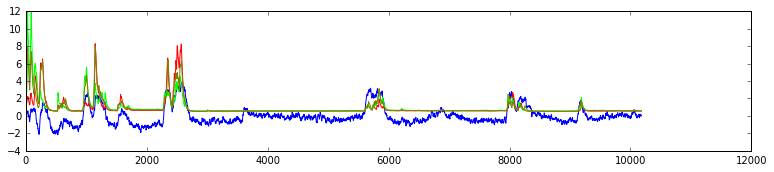


7


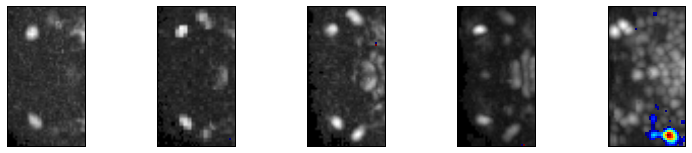

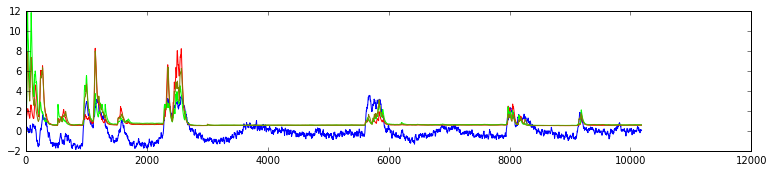


8


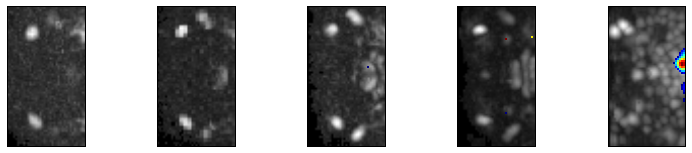

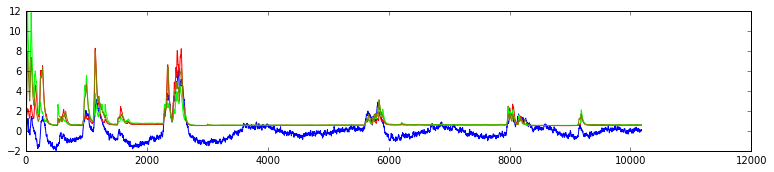


9


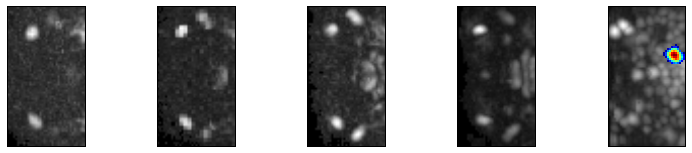

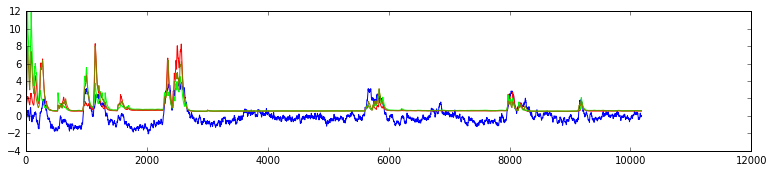


10


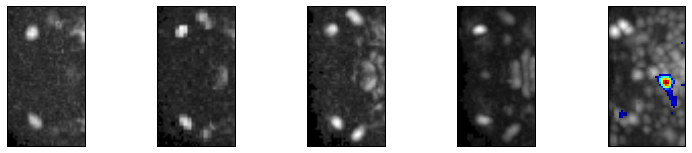

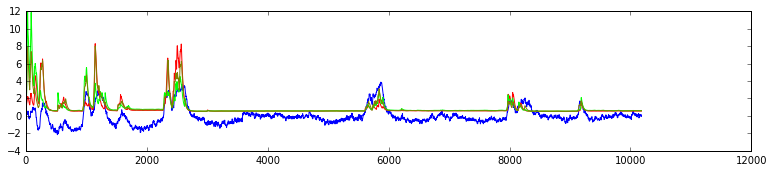


11


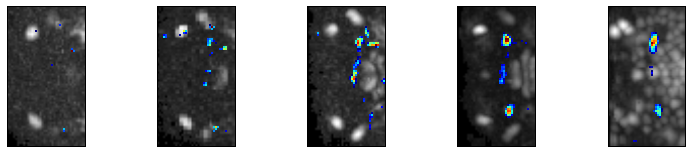

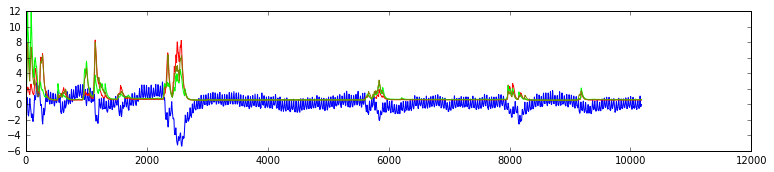


12


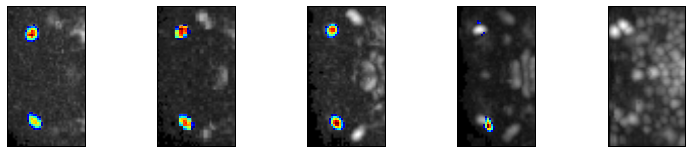

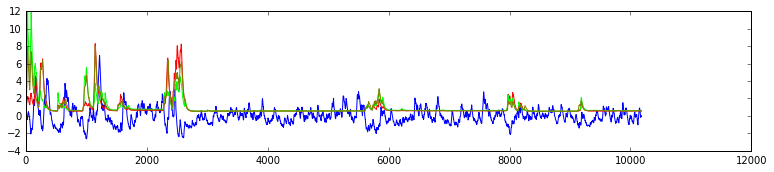

alpha
13


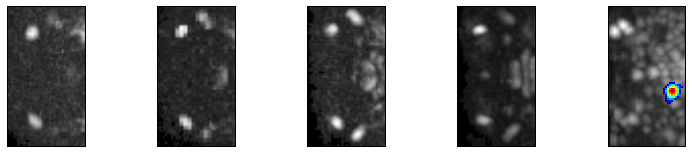

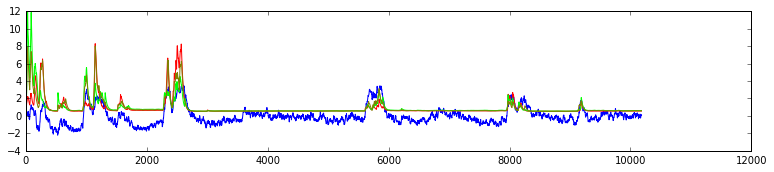


14


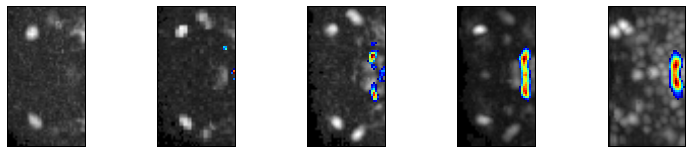

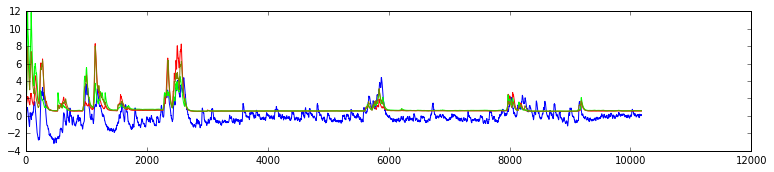


15


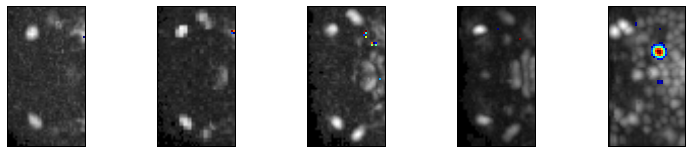

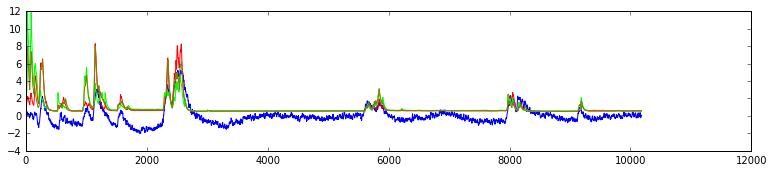


16


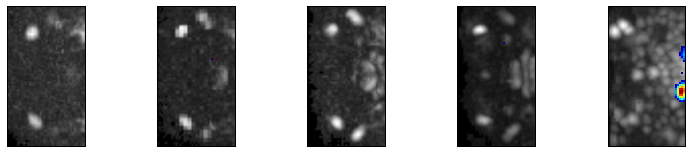

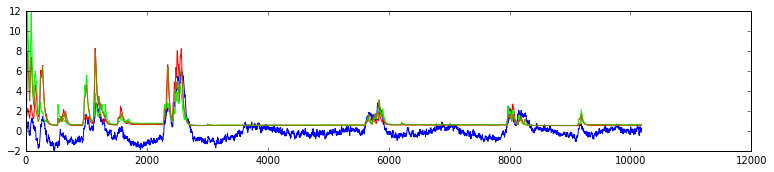


17


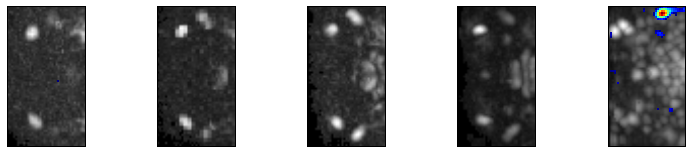

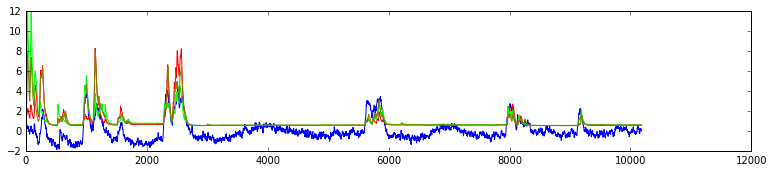


18


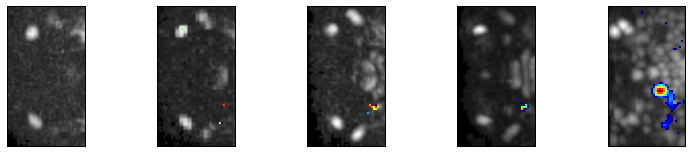

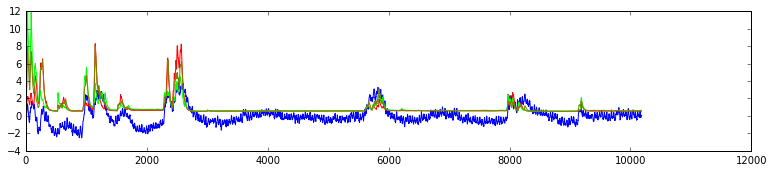


19


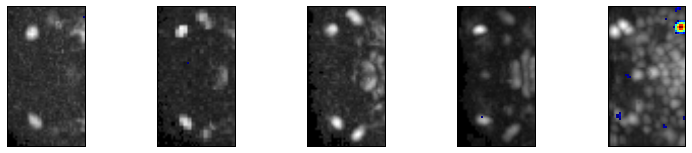

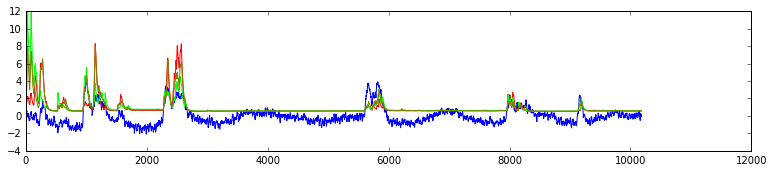


20


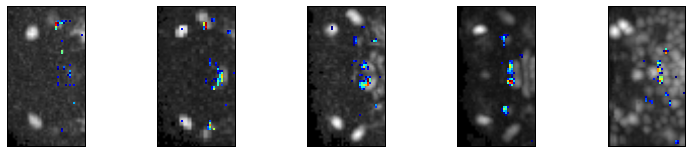

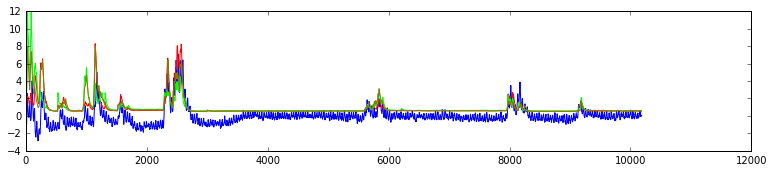


21


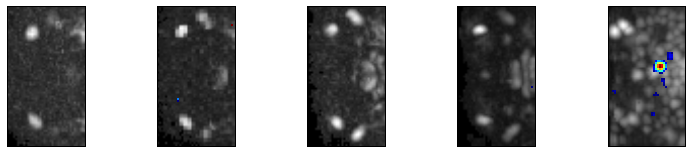

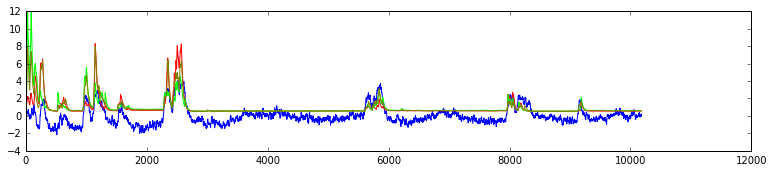


22


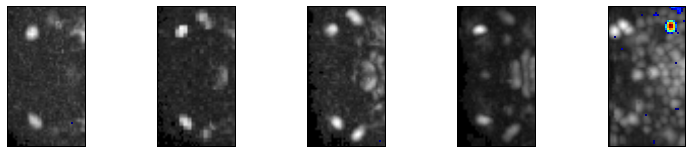

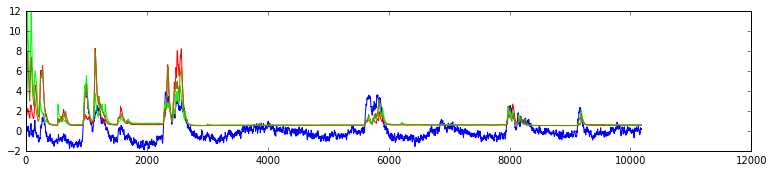


23


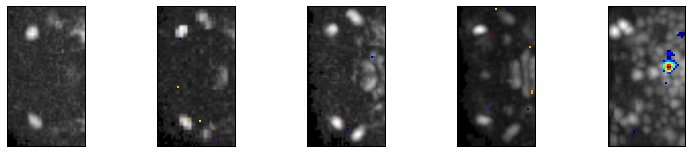

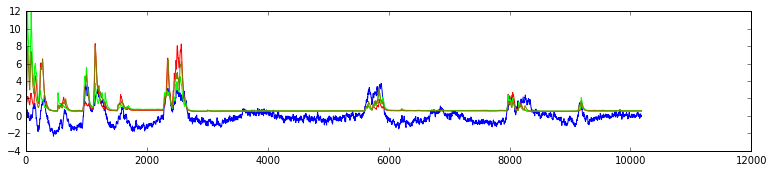


24


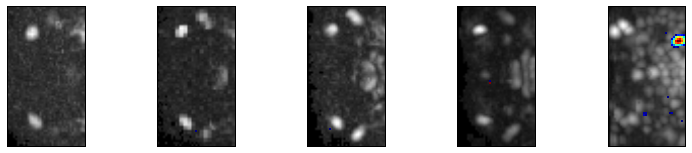

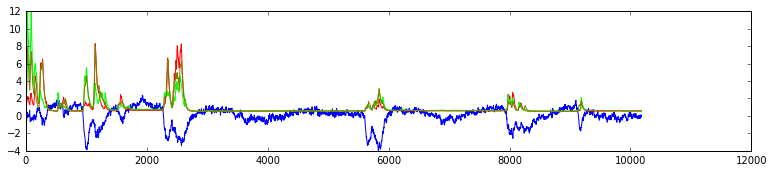


25


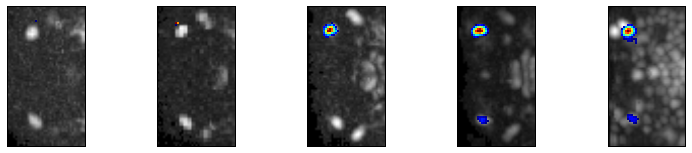

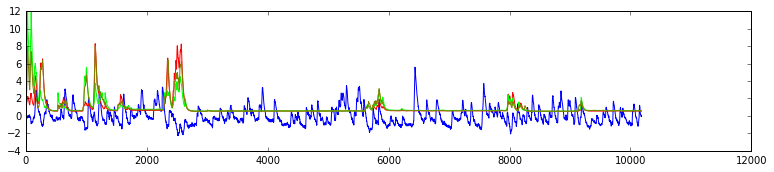

alpha
26


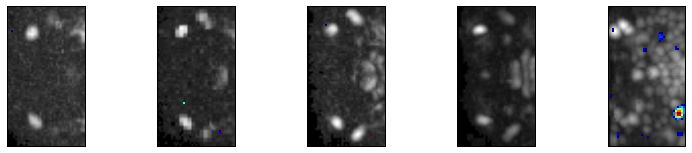

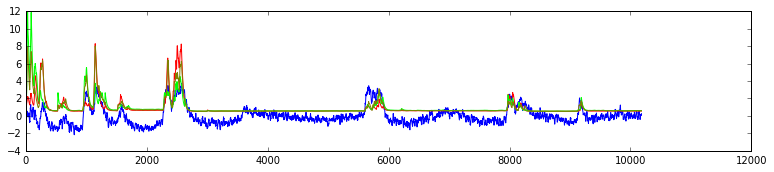


27


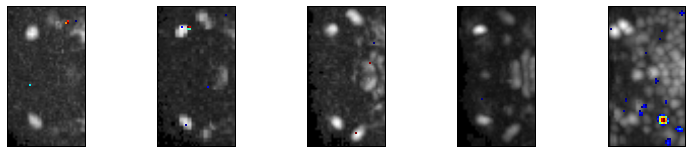

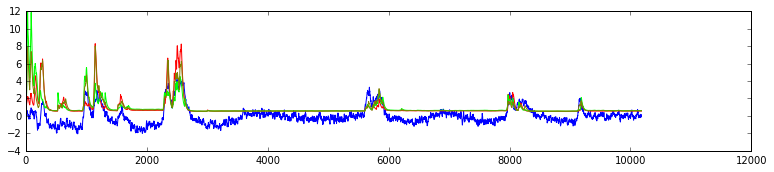


28


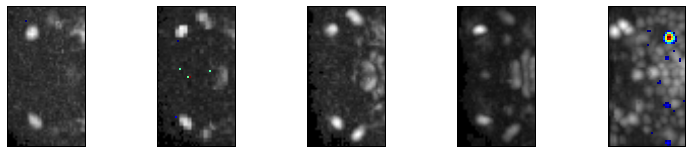

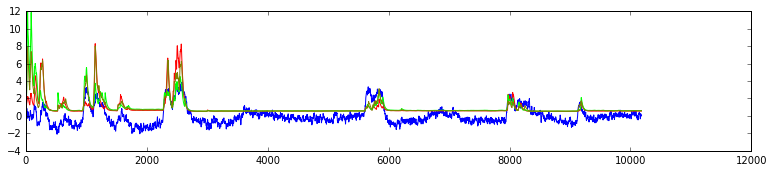


29


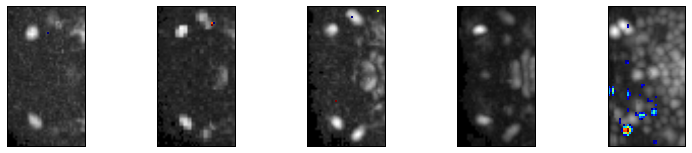

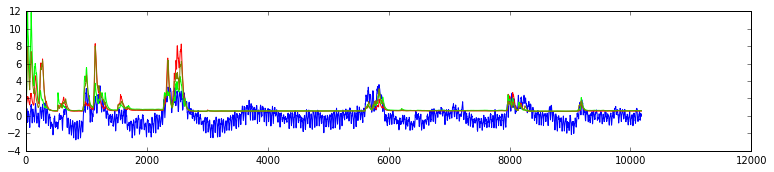


30


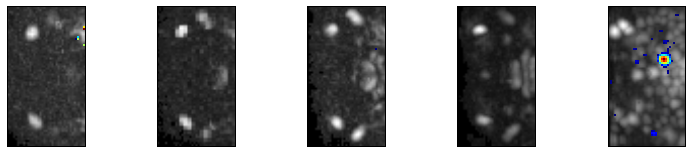

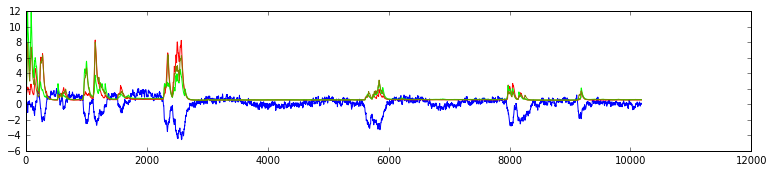


31


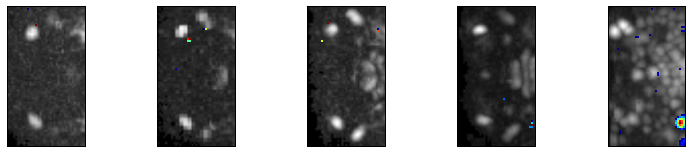

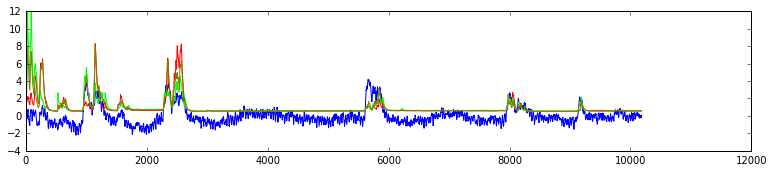


32


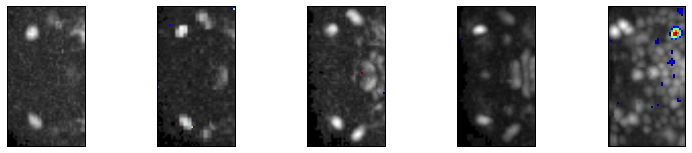

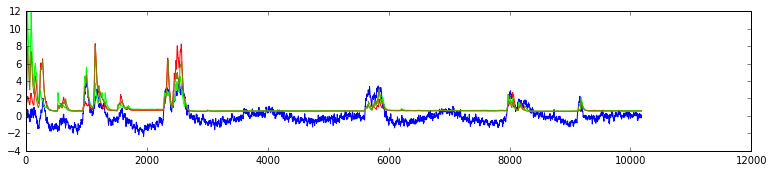


33


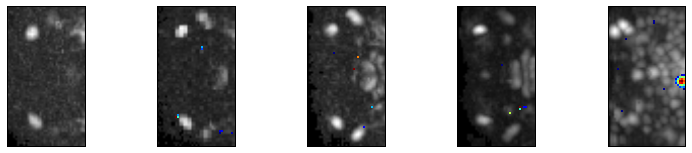

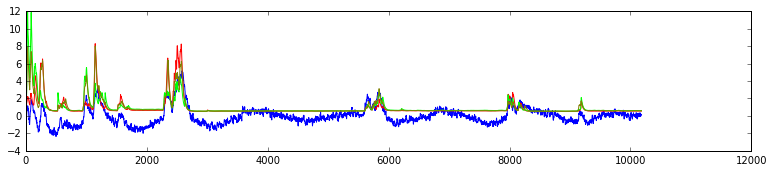


34


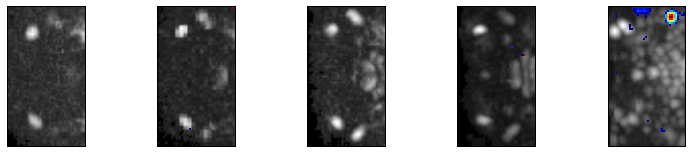

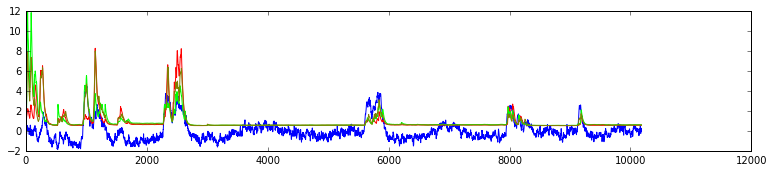


35


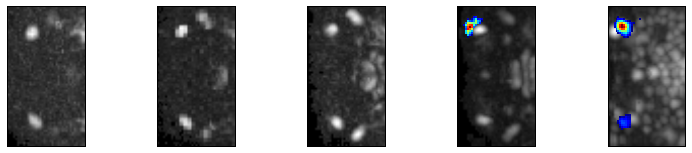

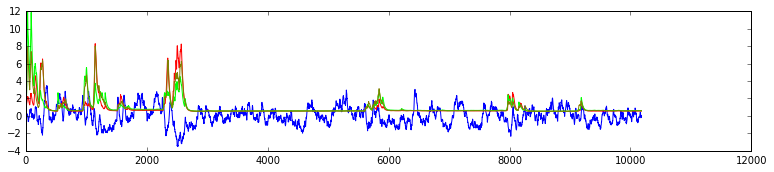

alpha
36


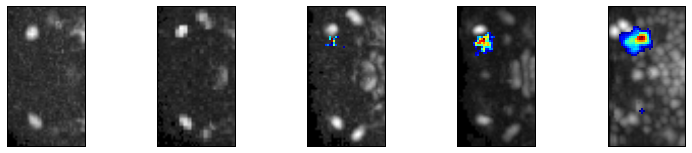

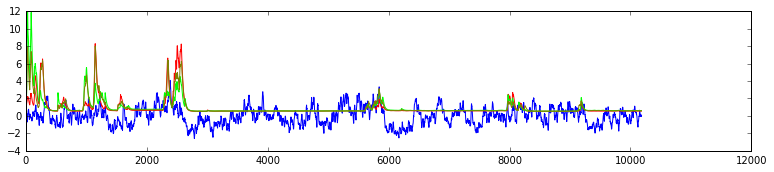


37


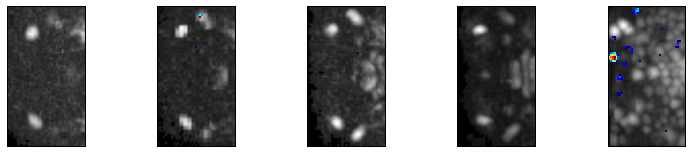

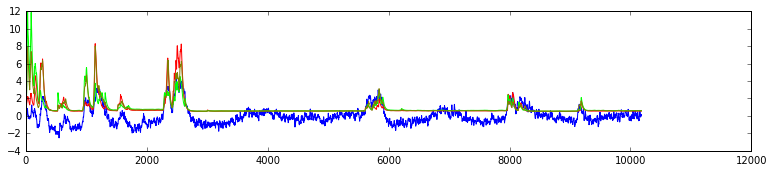


38


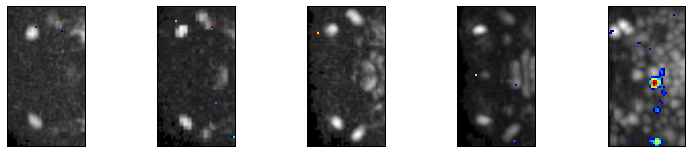

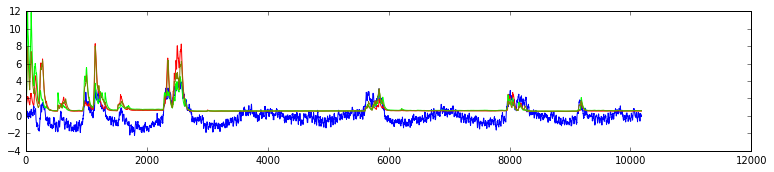


39


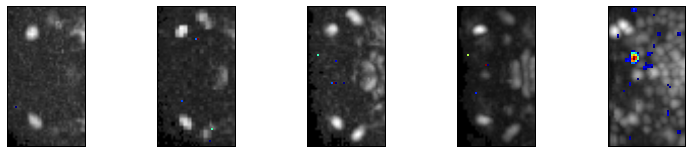

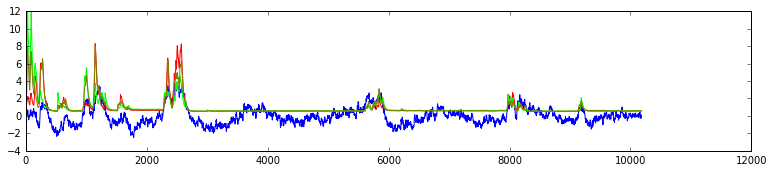


40


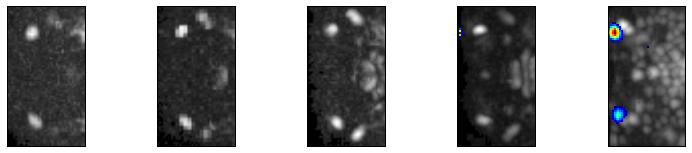

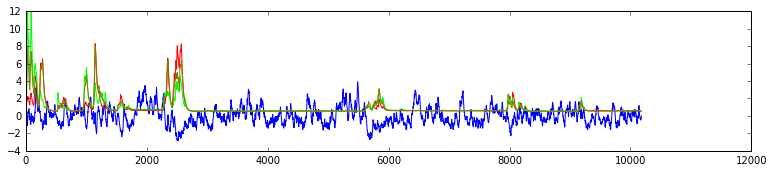

alpha
41


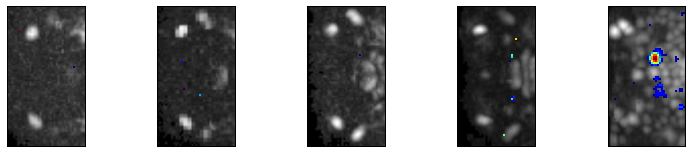

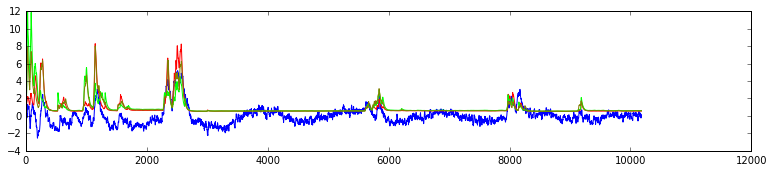


42


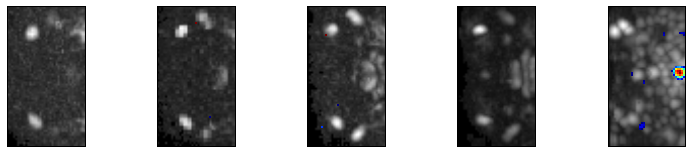

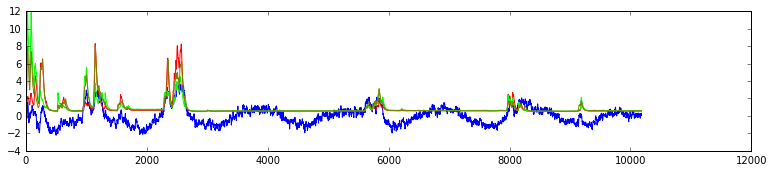


43


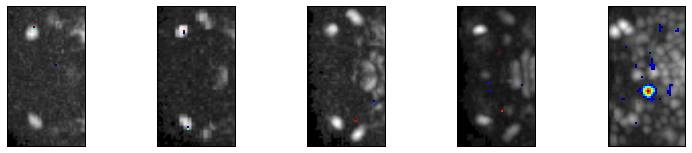

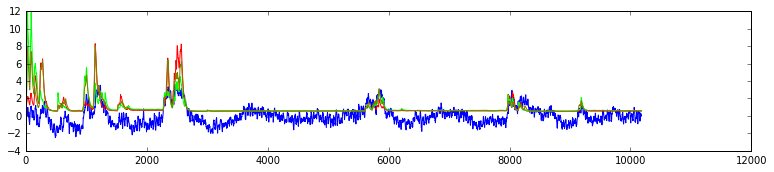


44


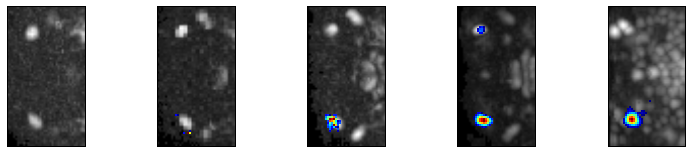

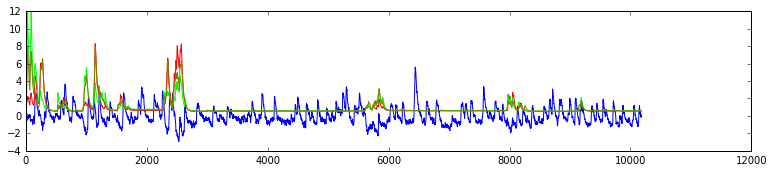

alpha
45


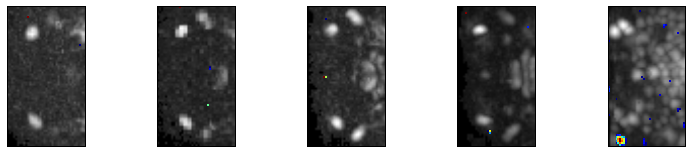

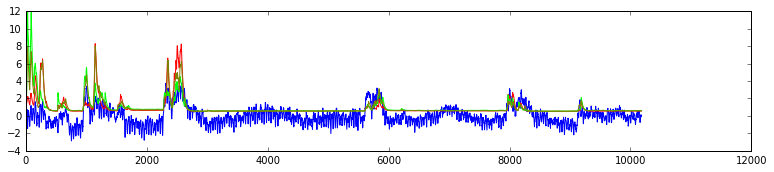


46


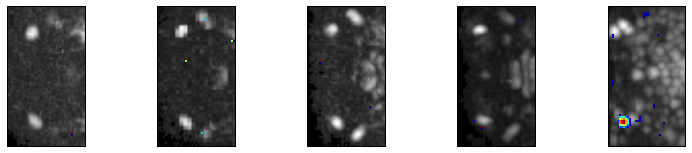

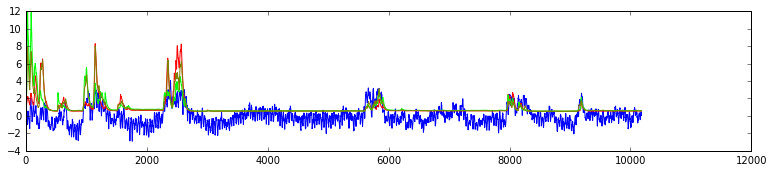


47


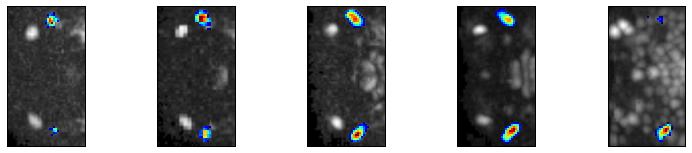

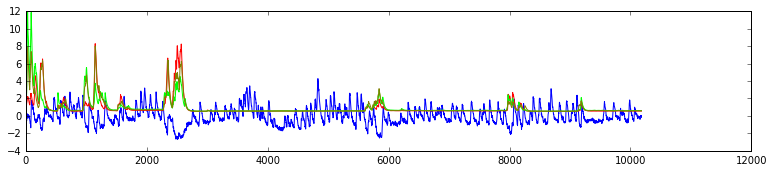

gamma
48


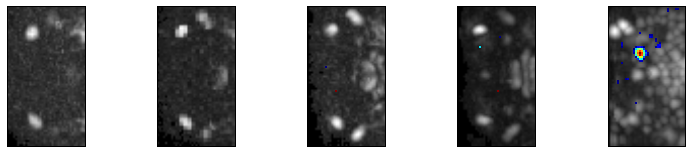

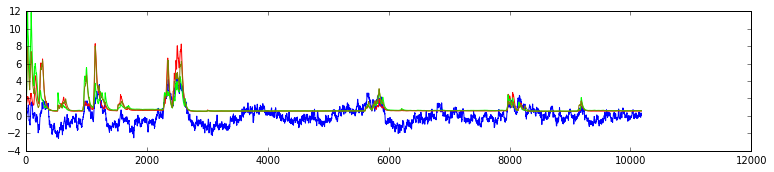


49


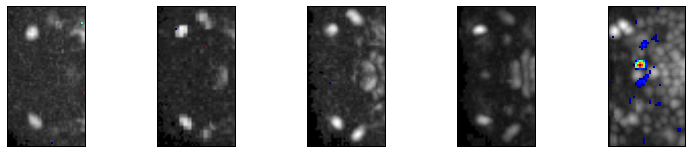

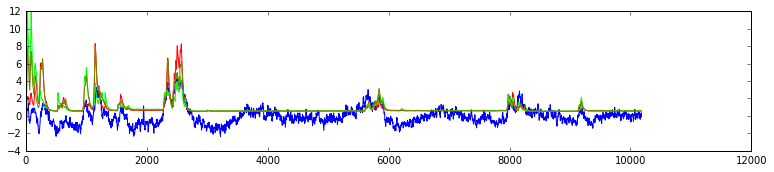


50


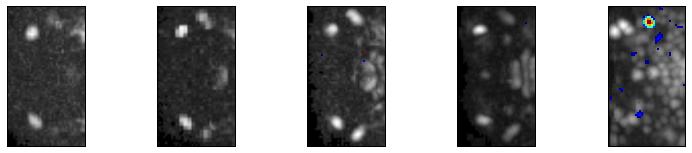

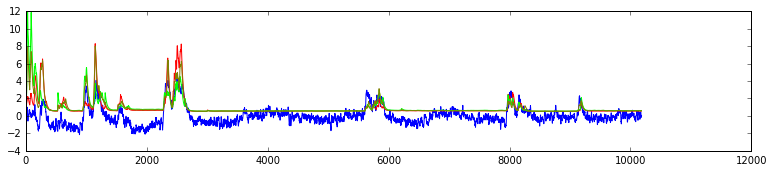


51


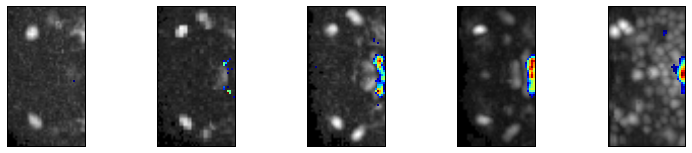

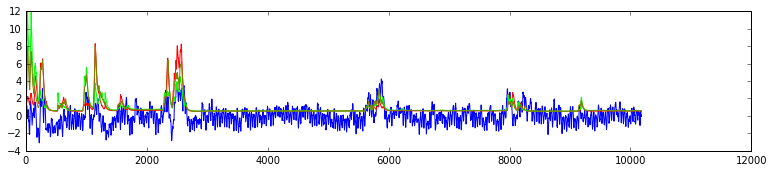


52


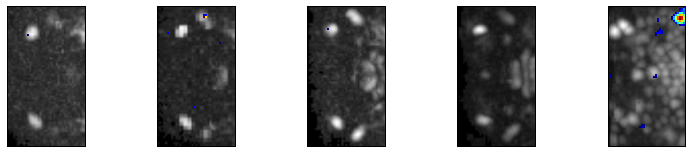

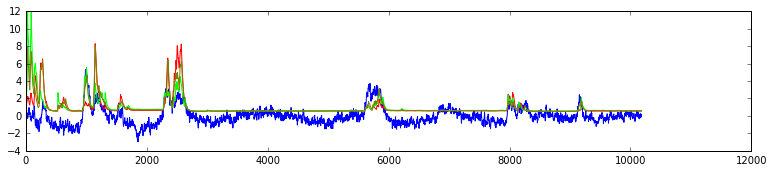


53


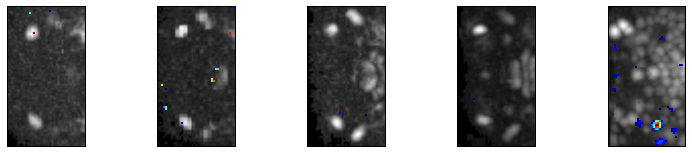

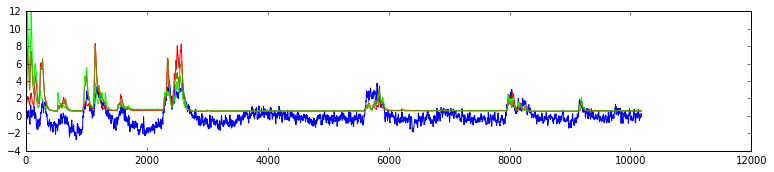


54


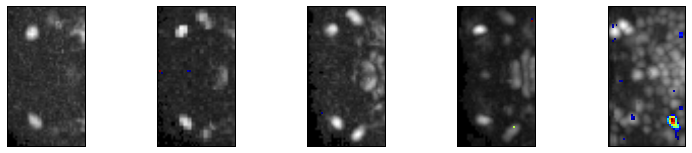

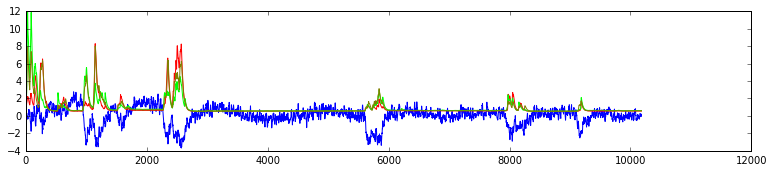


55


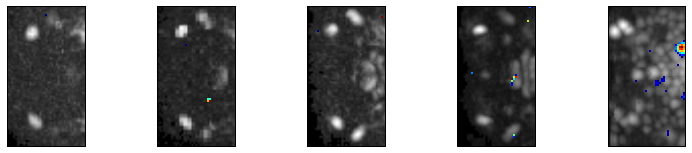

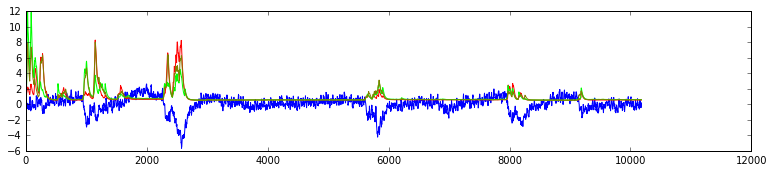


56


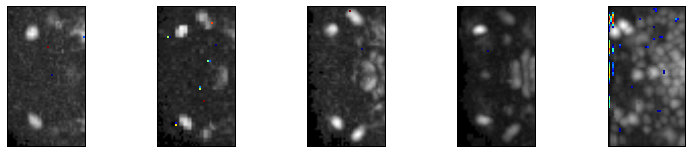

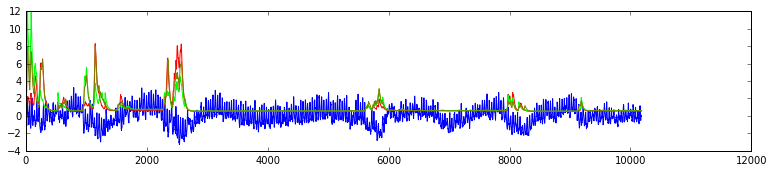


57


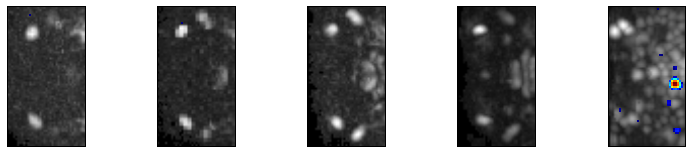

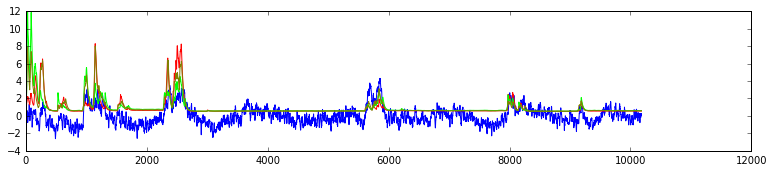


58


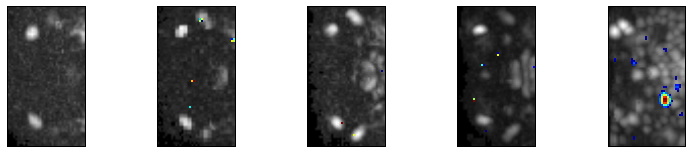

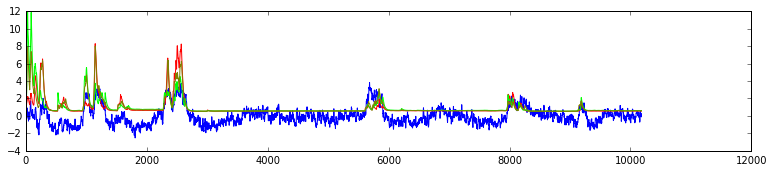


59


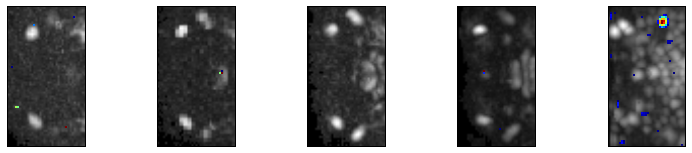

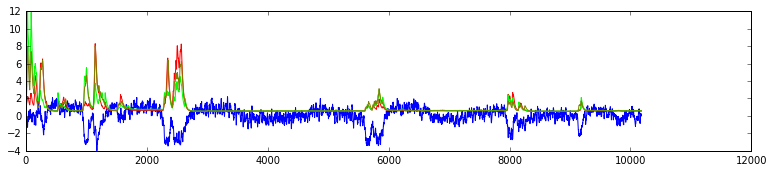


60


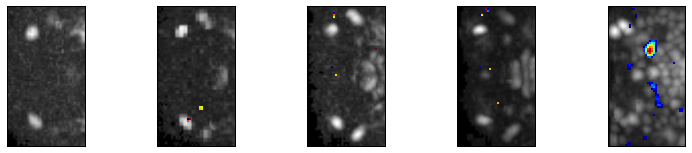

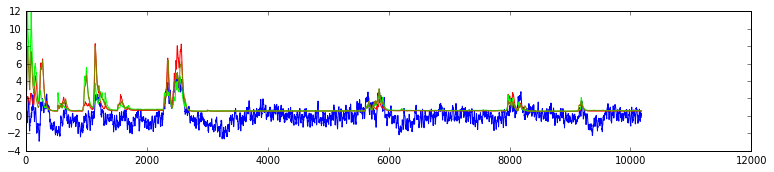


61


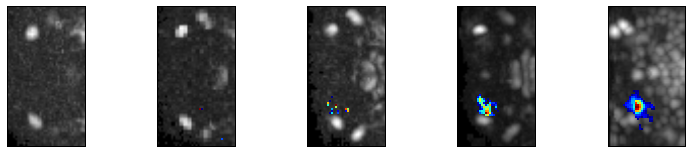

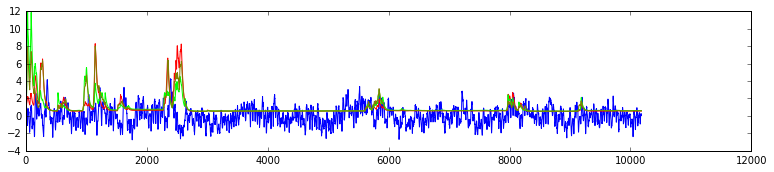


62


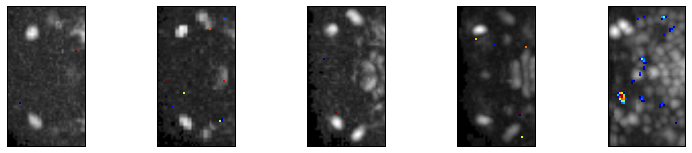

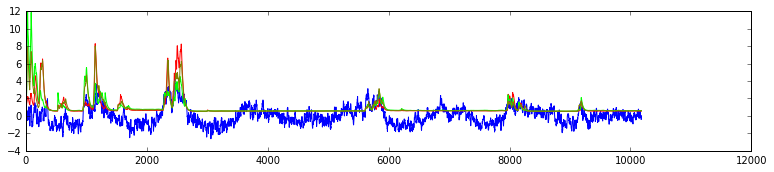


63


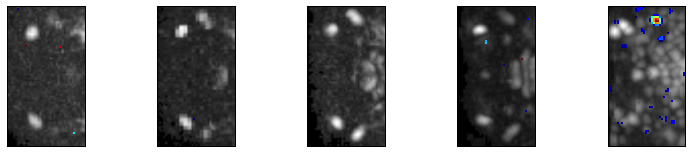

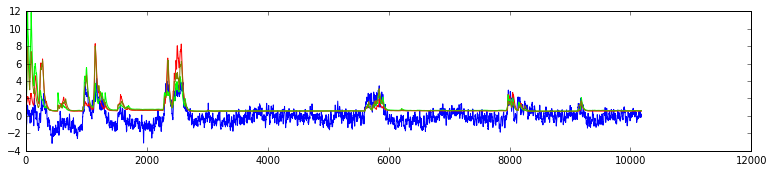


64


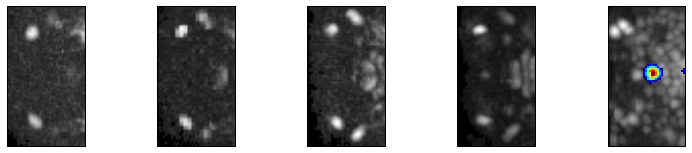

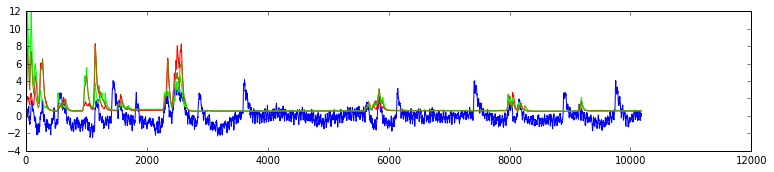


65


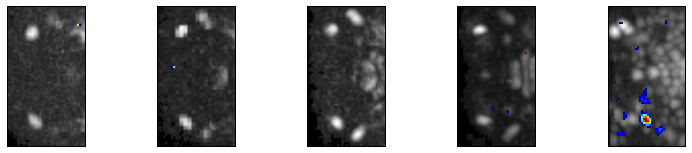

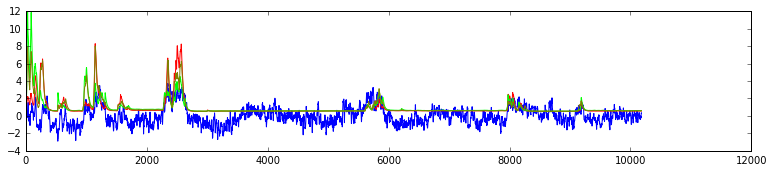


66


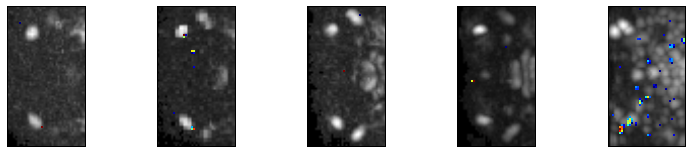

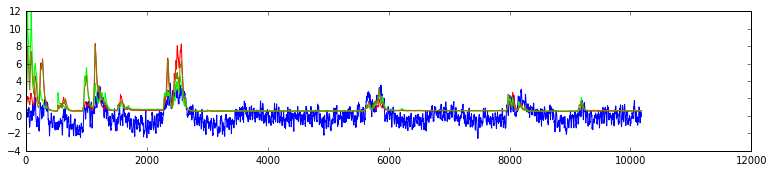


67


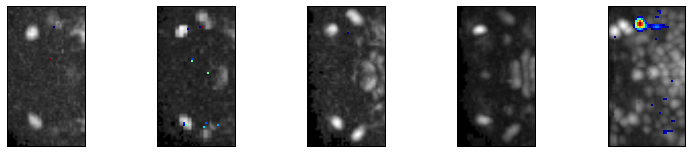

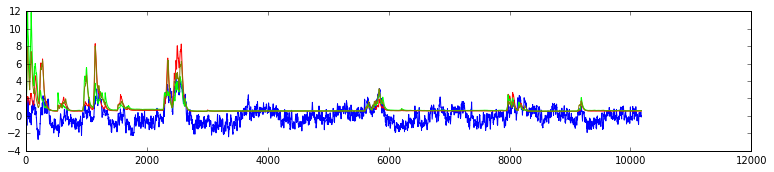


68


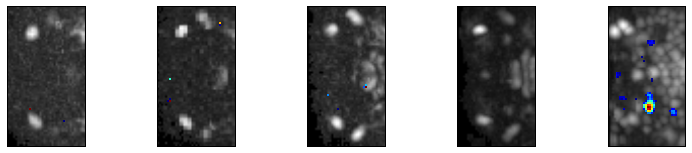

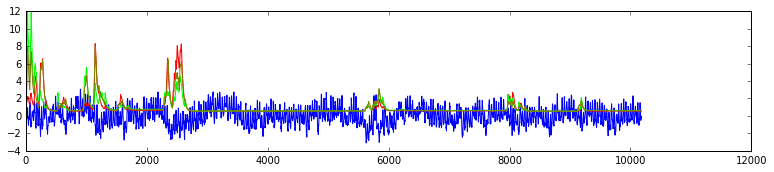


69


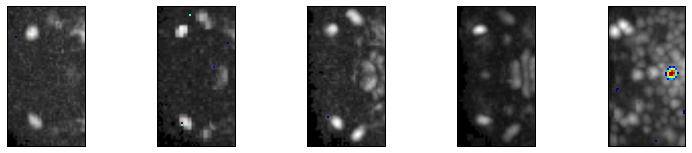

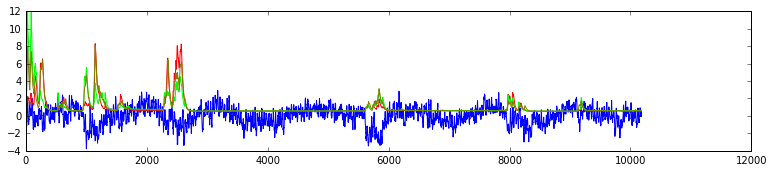


70


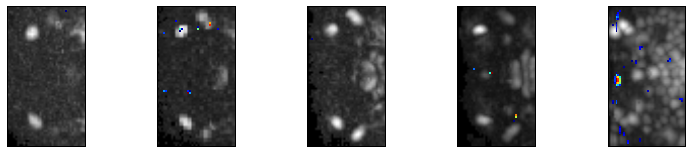

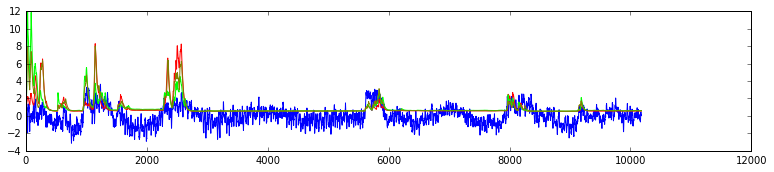


71


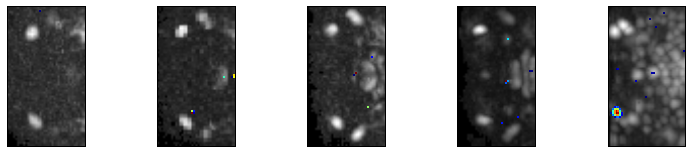

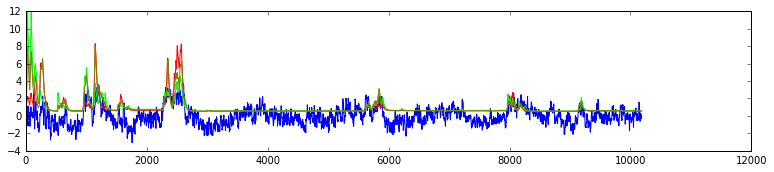


72


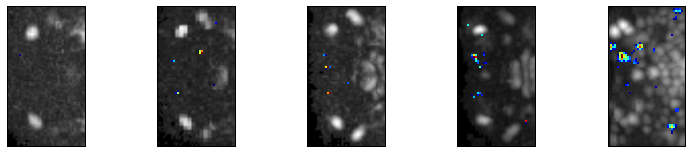

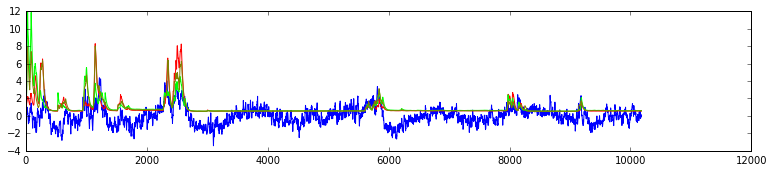


73


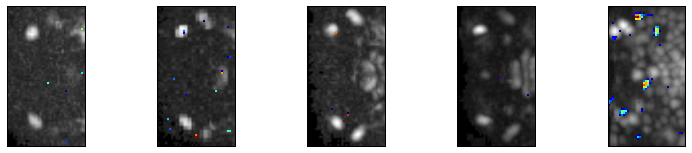

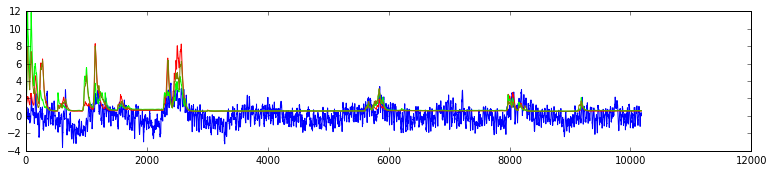


74


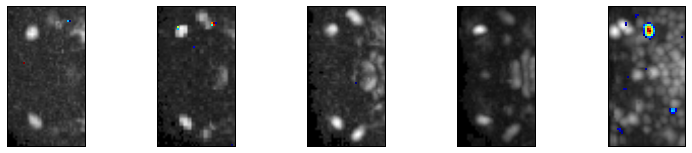

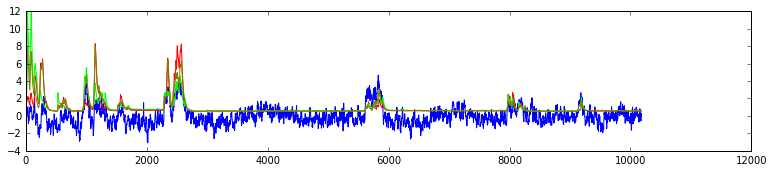


75


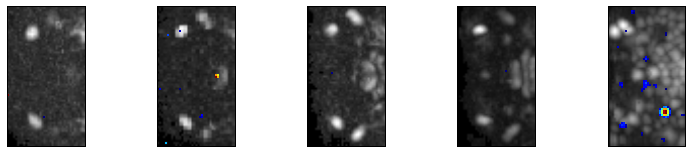

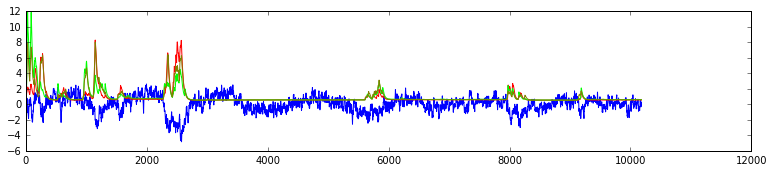


76


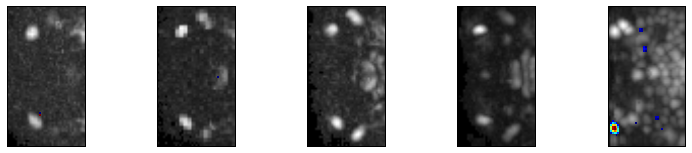

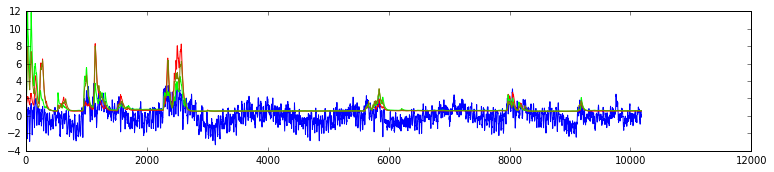


77


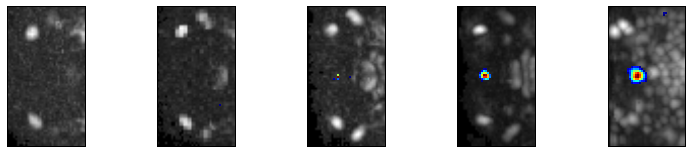

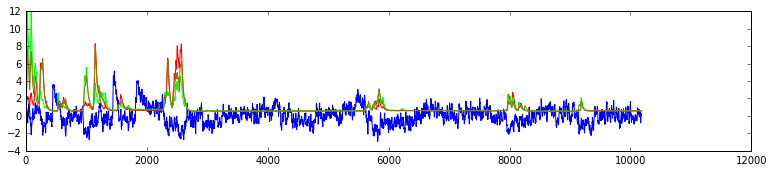


78


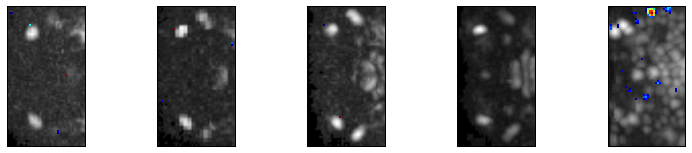

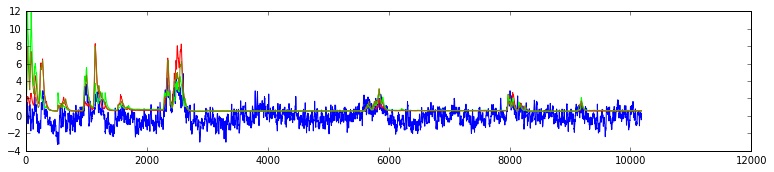


79


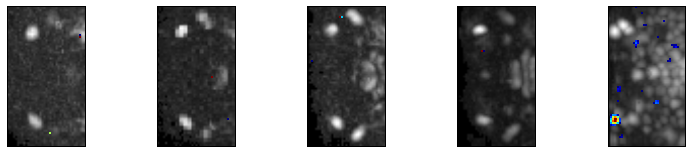

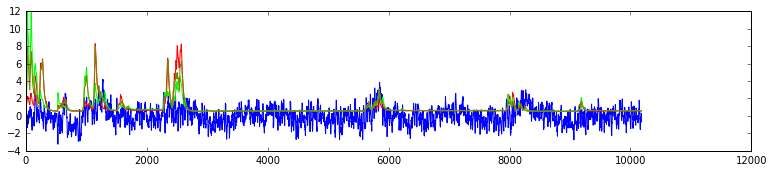


80


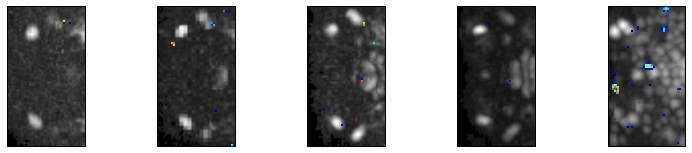

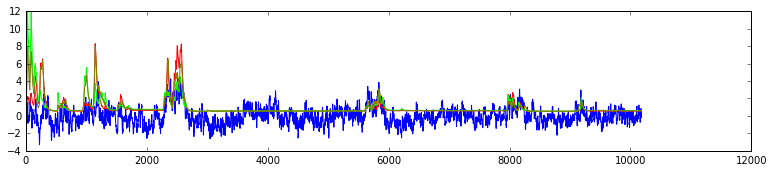


81


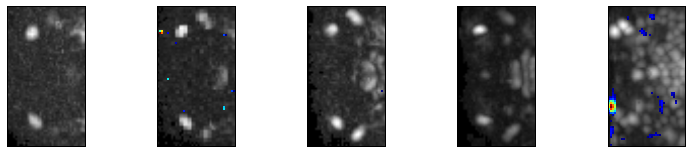

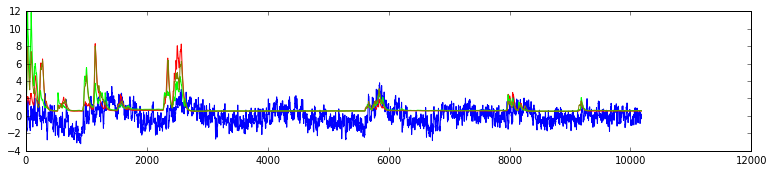


82


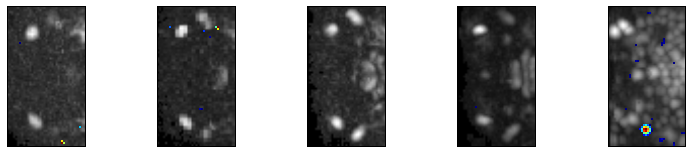

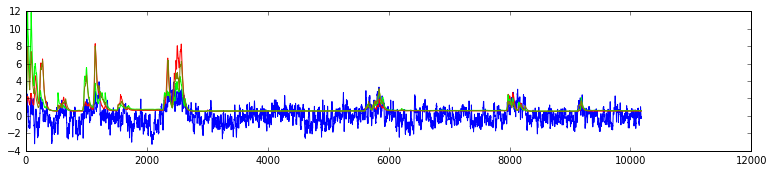


83


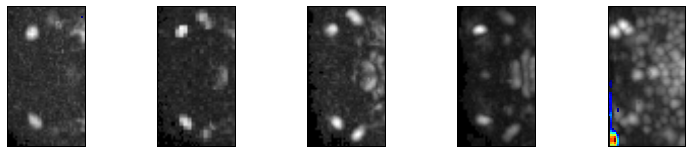

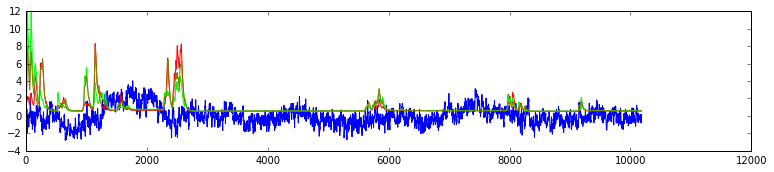

In [35]:
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
    plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
    plt.plot(Xk[2,:]/np.std(Xk[2,:])+0.5,color=(0.5,0.5,0))    
    #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    
    plt.show()
    
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

In [36]:





#zip(range(S[3]),Label_ICs)

In [37]:
set(Label_ICs)

{'', 'alpha', 'gamma'}

In [38]:
#Label_ICs[94]='M'

In [41]:
Xk=Xk.T

In [42]:
Xk.shape

(6, 10183)

In [43]:
Xksmoothed=np.zeros(Xk.shape)

Xksmoothed[0,:]=np.convolve(Xk[0,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[1,:]=np.convolve(Xk[1,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[2,:]=np.convolve(Xk[2,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xkdff=Xk-Xksmoothed

In [44]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((6,S[3]))

In [45]:
from sklearn import linear_model

In [46]:
algorithm = linear_model.LinearRegression()

In [47]:
for j in range(S[3]):
    model = algorithm.fit(Xkdff.T, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(Xkdff.T,DT[:,j])

In [48]:
max(max(Rsq))

0.68857074041463662

0
[ 0.62663745]
[  5.70836577e-06  -9.30308772e-06   8.70842472e-06   1.13151378e-04
   4.10769045e-05   2.43080809e-05]
1
[ 0.68857074]
[  2.19062053e-06  -3.82271604e-06   3.13187255e-06   6.52874601e-05
   9.57333817e-06   2.33880253e-06]
2
[ 0.65870888]
[ -5.57480973e-06   7.76517357e-06  -4.30812241e-06  -1.43709272e-04
  -1.49461762e-05   1.72849355e-05]
3
[ 0.63145044]
[  1.43801887e-06  -2.34109986e-05   2.47960710e-05   3.14939545e-04
   2.19060449e-05  -1.43426608e-05]
4
[ 0.60798404]
[ -1.48920575e-07  -2.37313493e-06   2.79459287e-06   3.42886614e-05
   2.48124667e-06   1.25216650e-06]
5
[ 0.60520956]
[  6.73860553e-08  -3.75106315e-06   4.58621661e-06   6.76007266e-05
   1.32029291e-05   5.02155584e-06]
6
[ 0.61774588]
[  7.93468676e-07  -5.44004135e-06   5.04395320e-06   9.28253108e-05
  -2.96900739e-06  -4.95349112e-06]
7
[ 0.63657853]
[ -1.02570841e-09  -1.70183415e-06   1.73792462e-06   2.44994847e-05
   3.04156666e-06   3.98611076e-07]
8
[ 0.58431202]
[  1.24804534e-0

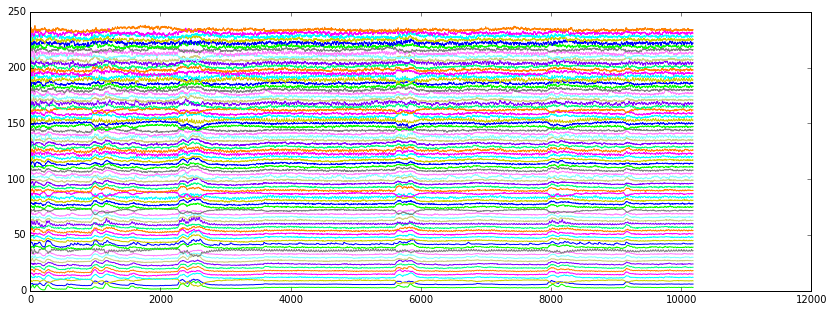

12
[ 0.05268269]
[  7.16437657e-07   6.64342943e-07  -1.61899928e-06  -1.57119862e-05
  -2.01049859e-05  -7.28907484e-06]
25
[ 0.09619283]
[  1.80599426e-07   2.17991925e-06  -2.72802707e-06  -1.87952318e-05
  -2.48215629e-05   2.34637577e-06]
35
[ 0.18883592]
[ -1.10202285e-06   3.36904298e-07   3.29429595e-08  -8.86454653e-06
  -1.46257493e-05  -3.73849855e-06]
40
[ 0.15866367]
[ -2.52689410e-07   1.49549122e-06  -1.17853415e-06  -1.98852158e-05
  -1.05210770e-05   6.76208140e-07]
44
[ 0.06787026]
[  2.18450729e-07   1.21290584e-06  -1.38594011e-06  -1.71909343e-05
  -5.06507865e-06   1.79833982e-06]


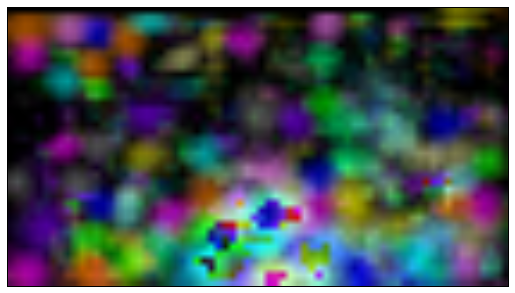

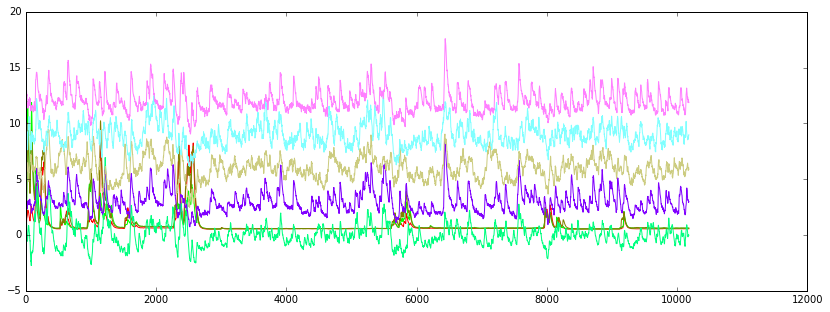

47
[ 0.1657848]
[ -4.28398844e-07   3.95734752e-07  -2.86600029e-07  -5.85729001e-06
  -3.28709051e-06   1.01807662e-06]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 12, 25, 35, 40, 44, 47]


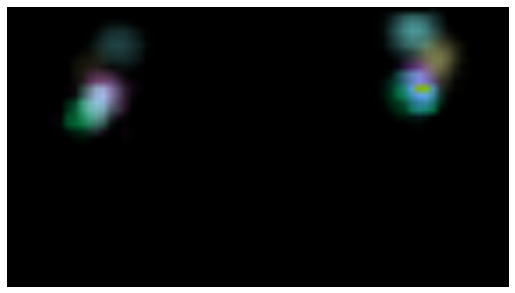

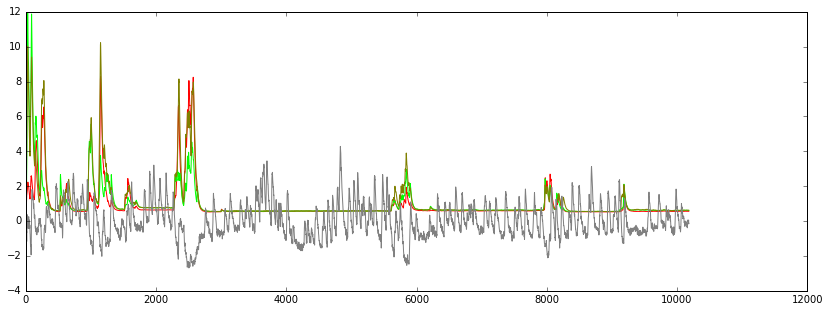

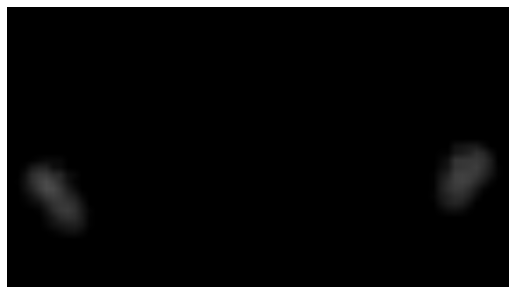

In [49]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([16,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
C1[13]=(0.2,0.5,0.5)
C1[14]=(0.5,0.2,0.5)
C1[15]=(0.5,0.5,0.2)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%12+1][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%15+1][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%12+1][:])
    print(Neworder[i])
    print(Rsq[:,Neworder[i]])
    print(Betas[:,Neworder[i]])
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
print(Neworder)

In [ ]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [ ]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [ ]:
plt.plot(Xkdff[range(3),:].T)